# Examining NYC after-school program locations with respect to population concentration

Author: Ian S. McBride

This notebook explores the question: are NYC's after-school programs geographically distributed where population is the highest.

Datasets used:
1. https://data.cityofnewyork.us/Social-Services/After-School-Programs/6ej9-7qyi
1. https://data.cityofnewyork.us/City-Government/New-York-City-Population-By-Neighborhood-Tabulatio/swpk-hqdp
1. https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas/cpf4-rkhq

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
programs = gpd.read_file('./datasets/After-School Programs.geojson')
display(programs.head())
display(programs.info())
print(programs.columns)

name weekly_hou evenings enrollment site_build  \
0       NYPL, Riverdale Branch  Full-time      Yes          0       5540   
1        NYPL, Sedgwick Branch  Full-time      Yes          0       1701   
2       NYPL, Soundview Branch  Full-time      Yes          0        660   
3  NYPL, Spuyten Duyvil Branch  Full-time      Yes          0        650   
4    NYPL, Throg's Neck Branch  Full-time      Yes          0       3025   

  estimated_  setting arts_cultu    agency_tel summer  \
0        0.0  Library        yes  212-340-0903    Yes   
1        0.0  Library        yes  212-340-0903    Yes   
2        0.0  Library        yes  212-340-0903    Yes   
3        0.0  Library        yes  212-340-0903    Yes   
4        0.0  Library        yes  212-340-0903    Yes   

                       ...                      cbo_servic  \
0                      ...                                   
1                      ...                                   
2                      ...                                   
3                      ...                                   
4                      ...                                   

                     site_stree academics site_zip high_schoo school_yea  \
0                Mosholu Avenue       yes  10471.0        Yes        Yes   
1  Martin Luther King Jr. Blvd.       yes  10453.0        Yes        Yes   
2              Soundview Avenue       yes  10473.0        Yes        Yes   
3             West 235th Street       yes  10463.0        Yes        Yes   
4         Cross Bronx Exp. Ext.       yes  10465.0        Yes        Yes   

  sports_phy middle_sch elementary  \
0         no        Yes        Yes   
1         no        Yes        Yes   
2         no        Yes        Yes   
3         no        Yes        Yes   
4         no        Yes        Yes   

                                       geometry  
0  POINT (-73.90275776491912 40.90373779101734)  
1  POINT (-73.91756999396574 40.84950596267019)  
2  POINT (-73.86289814549073 40.81872411282782)  
3  POINT (-73.91463119891688 40.88624159222323)  
4  POINT (-73.81911186664304 40.82288852359624)  

[5 rows x 31 columns]

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 31 columns):
name          1456 non-null object
weekly_hou    1456 non-null object
evenings      1456 non-null object
enrollment    1456 non-null object
site_build    1456 non-null object
estimated_    1456 non-null object
setting       1456 non-null object
arts_cultu    1456 non-null object
agency_tel    1456 non-null object
summer        1456 non-null object
school_id     1456 non-null object
weekends      1456 non-null object
address2      1456 non-null object
site_borou    1456 non-null object
site_name     1456 non-null object
id            1456 non-null object
sp_ein        1456 non-null object
agency_nam    1456 non-null object
address1      1456 non-null object
program_ty    1456 non-null object
cbo_sp_tel    1456 non-null object
cbo_servic    1456 non-null object
site_stree    1456 non-null object
academics     1456 non-null object
site_zip      1456 non-null object
high_schoo

None

Index(['name', 'weekly_hou', 'evenings', 'enrollment', 'site_build',
       'estimated_', 'setting', 'arts_cultu', 'agency_tel', 'summer',
       'school_id', 'weekends', 'address2', 'site_borou', 'site_name', 'id',
       'sp_ein', 'agency_nam', 'address1', 'program_ty', 'cbo_sp_tel',
       'cbo_servic', 'site_stree', 'academics', 'site_zip', 'high_schoo',
       'school_yea', 'sports_phy', 'middle_sch', 'elementary', 'geometry'],
      dtype='object')


In [3]:
# Trim away unneeded columns in programs
programs_trim = programs[['name', 'geometry']]

ntacode     shape_area county_fips         ntaname     shape_leng  \
0    BK88  54005019.0709         047    Borough Park  39247.2280277   
1    QN51  52488276.8358         081     Murray Hill  33266.9048607   
2    QN27  19726845.6252         081   East Elmhurst  19816.7123182   
3    QN07  22887772.8652         081          Hollis  20976.3355739   
4    MN06  10647077.4989         061  Manhattanville  17040.6854134   

   boro_name boro_code                                           geometry  
0   Brooklyn         3  (POLYGON ((-73.97604935657381 40.6312759056467...  
1     Queens         4  (POLYGON ((-73.80379022888246 40.7756101117924...  
2     Queens         4  (POLYGON ((-73.86109724335759 40.7636644770869...  
3     Queens         4  (POLYGON ((-73.75725671509139 40.7181386016625...  
4  Manhattan         1  (POLYGON ((-73.94607828674226 40.8212632160619...

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
ntacode        195 non-null object
shape_area     195 non-null object
county_fips    195 non-null object
ntaname        195 non-null object
shape_leng     195 non-null object
boro_name      195 non-null object
boro_code      195 non-null object
geometry       195 non-null object
dtypes: object(8)
memory usage: 12.3+ KB


None

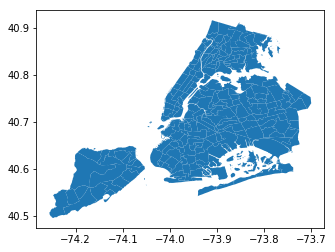

In [4]:
# Read areas file and display summary
areas = gpd.read_file('./datasets/Neighborhood Tabulation Areas.geojson')
display(areas.head())
display(areas.info())
areas.plot()

In [5]:
# Read population file and display summary
population = pd.read_csv('./datasets/New_York_City_Population_By_Neighborhood_Tabulation_Areas.csv')
display(population.head())
display(population.info())

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 6 columns):
Borough             390 non-null object
Year                390 non-null int64
FIPS County Code    390 non-null int64
NTA Code            390 non-null object
NTA Name            390 non-null object
Population          390 non-null int64
dtypes: int64(3), object(3)
memory usage: 18.4+ KB


None

In [6]:
# Trim away unneeded columns in population df
population_trim = population[['NTA Code', 'Population', 'Year']]
population_trim.columns = ['ntacode', 'population', 'year']
population_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 3 columns):
ntacode       390 non-null object
population    390 non-null int64
year          390 non-null int64
dtypes: int64(2), object(1)
memory usage: 9.2+ KB


In [7]:
# Print year values in population_trim df
population_trim.year.unique()

array([2000, 2010])

In [8]:
# Select population data for the year 2010
year_mask = population_trim['year'] == 2010
population_2010 = population_trim[year_mask]
display(population_2010.info())
display(population_2010.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 195 to 389
Data columns (total 3 columns):
ntacode       195 non-null object
population    195 non-null int64
year          195 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.1+ KB


None

ntacode  population  year
195    BX01       31078  2010
196    BX03       34517  2010
197    BX05       54415  2010
198    BX06       27378  2010
199    BX07       35538  2010

In [9]:
# Merge the 2010 population and areas dataframes
population_by_area = areas.merge(population_2010, on='ntacode')
display(population_by_area.info())
display(population_by_area.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 10 columns):
ntacode        195 non-null object
shape_area     195 non-null object
county_fips    195 non-null object
ntaname        195 non-null object
shape_leng     195 non-null object
boro_name      195 non-null object
boro_code      195 non-null object
geometry       195 non-null object
population     195 non-null int64
year           195 non-null int64
dtypes: int64(2), object(8)
memory usage: 16.8+ KB


None

ntacode     shape_area county_fips         ntaname     shape_leng  \
0    BK88  54005019.0709         047    Borough Park  39247.2280277   
1    QN51  52488276.8358         081     Murray Hill  33266.9048607   
2    QN27  19726845.6252         081   East Elmhurst  19816.7123182   
3    QN07  22887772.8652         081          Hollis  20976.3355739   
4    MN06  10647077.4989         061  Manhattanville  17040.6854134   

   boro_name boro_code                                           geometry  \
0   Brooklyn         3  (POLYGON ((-73.97604935657381 40.6312759056467...   
1     Queens         4  (POLYGON ((-73.80379022888246 40.7756101117924...   
2     Queens         4  (POLYGON ((-73.86109724335759 40.7636644770869...   
3     Queens         4  (POLYGON ((-73.75725671509139 40.7181386016625...   
4  Manhattan         1  (POLYGON ((-73.94607828674226 40.8212632160619...   

   population  year  
0      106357  2010  
1       51739  2010  
2       23150  2010  
3       20269  2010  
4       22950  2010

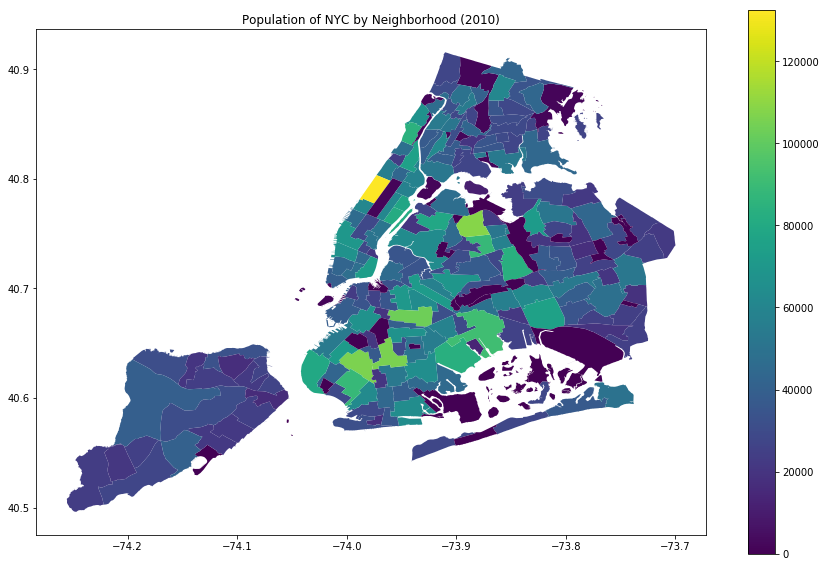

In [10]:
# Plot 2010 population on areas
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
img = population_by_area.plot(ax=ax, column='population')
ax.set_title('Population of NYC by Neighborhood (2010)')

# Colorbars in geopandas are poorly supported
# The hack below came from: https://stackoverflow.com/a/49400266
from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=population_by_area['population'].min(), vmax=population_by_area['population'].max())
n_cmap = cm.ScalarMappable(norm=norm)
n_cmap.set_array([])
fig.colorbar(n_cmap)

Text(0.5, 1.0, 'After-School Program Locations')

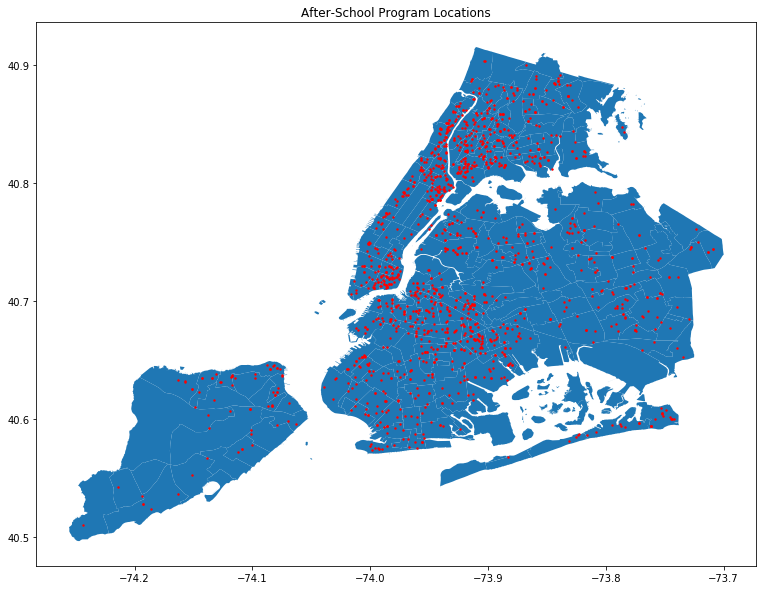

In [11]:
# Plot programs on areas
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
img = areas.plot(ax=ax)
programs_trim.plot(ax=ax, marker='o', color='red', markersize=2);
ax.set_title('After-School Program Locations')

In [12]:
# Trim away unneeded columns in areas
areas_trim = areas[['ntacode', 'geometry']]

In [13]:
# Count program sites per area
areas_programs = gpd.sjoin(areas_trim, programs_trim, op='intersects')
display(areas_programs.info())
display(areas_programs.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1456 entries, 0 to 194
Data columns (total 4 columns):
ntacode        1456 non-null object
geometry       1456 non-null object
index_right    1456 non-null int64
name           1456 non-null object
dtypes: int64(1), object(3)
memory usage: 56.9+ KB


None

ntacode                                           geometry  index_right  \
0    BK88  (POLYGON ((-73.97604935657381 40.6312759056467...          720   
0    BK88  (POLYGON ((-73.97604935657381 40.6312759056467...         1025   
0    BK88  (POLYGON ((-73.97604935657381 40.6312759056467...          844   
0    BK88  (POLYGON ((-73.97604935657381 40.6312759056467...          208   
0    BK88  (POLYGON ((-73.97604935657381 40.6312759056467...          621   

                                                name  
0    OST - Church Avenue Merchants Block Association  
0                                  BPL, Ryder Branch  
0  OST - Federation of Italian-American Organizat...  
0                               BPL, Mapleton Branch  
0                           OST - Bnos Zion of Bobov

In [14]:
areas_programs_count = areas_programs.groupby('ntacode').count()
display(areas_programs_count.info())
display(areas_programs_count.head())

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, BK09 to SI54
Data columns (total 3 columns):
geometry       186 non-null int64
index_right    186 non-null int64
name           186 non-null int64
dtypes: int64(3)
memory usage: 5.8+ KB


None

geometry  index_right  name
ntacode                             
BK09            5            5     5
BK17            7            7     7
BK19            7            7     7
BK21            9            9     9
BK23            3            3     3

In [15]:
# Trim unneeded columns in areas_programs
areas_programs_count['ntacode'] = areas_programs_count.index
areas_programs_count_trim = areas_programs_count[['ntacode', 'name']]
areas_programs_count_trim.columns = ['ntacode', 'count']

areas_programs_count_trim.index.rename('index', inplace=True)
areas_programs_count_trim.index = np.arange(len(areas_programs_count_trim))
display(areas_programs_count_trim.info())
display(areas_programs_count_trim.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 2 columns):
ntacode    186 non-null object
count      186 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


None

ntacode  count
0    BK09      5
1    BK17      7
2    BK19      7
3    BK21      9
4    BK23      3

In [16]:
# Merge the program counts and areas dataframes
counts_by_area = areas.merge(areas_programs_count_trim, on='ntacode')
display(counts_by_area.info())
display(counts_by_area.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 9 columns):
ntacode        186 non-null object
shape_area     186 non-null object
county_fips    186 non-null object
ntaname        186 non-null object
shape_leng     186 non-null object
boro_name      186 non-null object
boro_code      186 non-null object
geometry       186 non-null object
count          186 non-null int64
dtypes: int64(1), object(8)
memory usage: 14.5+ KB


None

ntacode     shape_area county_fips         ntaname     shape_leng  \
0    BK88  54005019.0709         047    Borough Park  39247.2280277   
1    QN51  52488276.8358         081     Murray Hill  33266.9048607   
2    QN27  19726845.6252         081   East Elmhurst  19816.7123182   
3    QN07  22887772.8652         081          Hollis  20976.3355739   
4    MN06  10647077.4989         061  Manhattanville  17040.6854134   

   boro_name boro_code                                           geometry  \
0   Brooklyn         3  (POLYGON ((-73.97604935657381 40.6312759056467...   
1     Queens         4  (POLYGON ((-73.80379022888246 40.7756101117924...   
2     Queens         4  (POLYGON ((-73.86109724335759 40.7636644770869...   
3     Queens         4  (POLYGON ((-73.75725671509139 40.7181386016625...   
4  Manhattan         1  (POLYGON ((-73.94607828674226 40.8212632160619...   

   count  
0     12  
1      5  
2      4  
3      5  
4      6

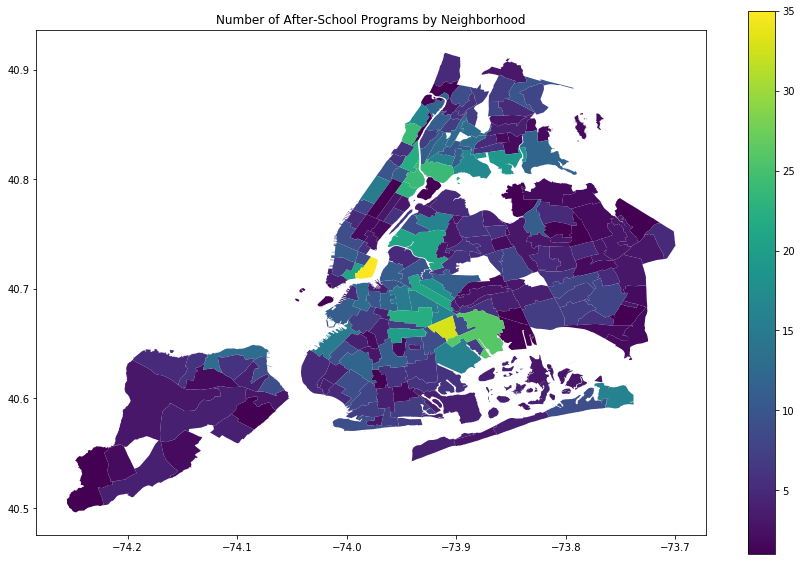

In [17]:
# Plot program counts on areas
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
img = counts_by_area.plot(ax=ax, column='count')
ax.set_title('Number of After-School Programs by Neighborhood')

# Colorbars in geopandas are poorly supported
# The hack below came from: https://stackoverflow.com/a/49400266
from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=counts_by_area['count'].min(), vmax=counts_by_area['count'].max())
n_cmap = cm.ScalarMappable(norm=norm)
n_cmap.set_array([])
fig.colorbar(n_cmap)

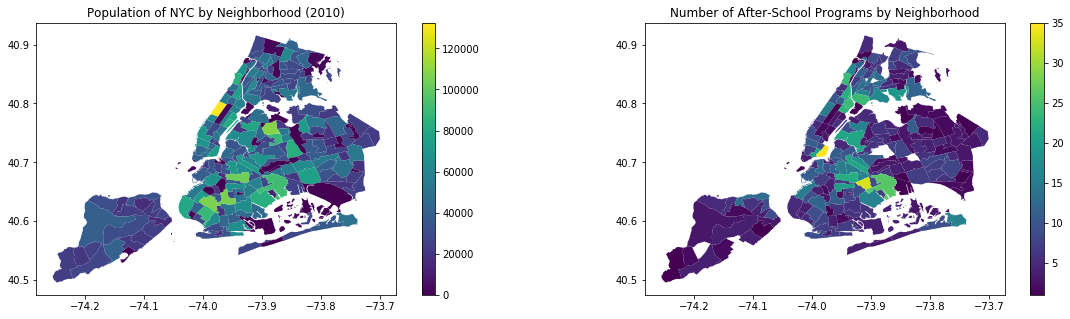

In [18]:
# Plot 2010 population on areas
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 2, 1)
img = population_by_area.plot(ax=ax1, column='population')
ax1.set_title('Population of NYC by Neighborhood (2010)')

# Colorbars in geopandas are poorly supported
# The hack below came from: https://stackoverflow.com/a/49400266
from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=population_by_area['population'].min(), vmax=population_by_area['population'].max())
n_cmap = cm.ScalarMappable(norm=norm)
n_cmap.set_array([])
fig.colorbar(n_cmap, ax=ax1)

# Plot program counts on areas
ax2 = fig.add_subplot(1, 2, 2)
img = counts_by_area.plot(ax=ax2, column='count')
ax2.set_title('Number of After-School Programs by Neighborhood')

# Colorbars in geopandas are poorly supported
# The hack below came from: https://stackoverflow.com/a/49400266
from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=counts_by_area['count'].min(), vmax=counts_by_area['count'].max())
n_cmap = cm.ScalarMappable(norm=norm)
n_cmap.set_array([])
fig.colorbar(n_cmap, ax=ax2)

## Interpreting the separate plots of population and program count 

The subplots above show that most after-school programs are not concentrated in neighborhood where population is high.

Combining these two subplots would improve readability. We'll do that next.

In [19]:
# Examine columns of dataframes to be combined
print(population_by_area.columns)
print(counts_by_area.columns)

Index(['ntacode', 'shape_area', 'county_fips', 'ntaname', 'shape_leng',
       'boro_name', 'boro_code', 'geometry', 'population', 'year'],
      dtype='object')
Index(['ntacode', 'shape_area', 'county_fips', 'ntaname', 'shape_leng',
       'boro_name', 'boro_code', 'geometry', 'count'],
      dtype='object')


In [20]:
# Trim away unneeded columns
pba_trim = population_by_area[['ntacode', 'geometry', 'population']]
cba_trim = counts_by_area[['ntacode', 'count']]

In [21]:
# Merge the two dataframes
pcba = pd.merge(pba_trim, cba_trim, on='ntacode')
pcba.columns

Index(['ntacode', 'geometry', 'population', 'count'], dtype='object')

In [22]:
# Our plot will have circle markers for each neighborhood
# therefore we need the centroids and not the polygons
pcba['geometry'] = pcba.centroid

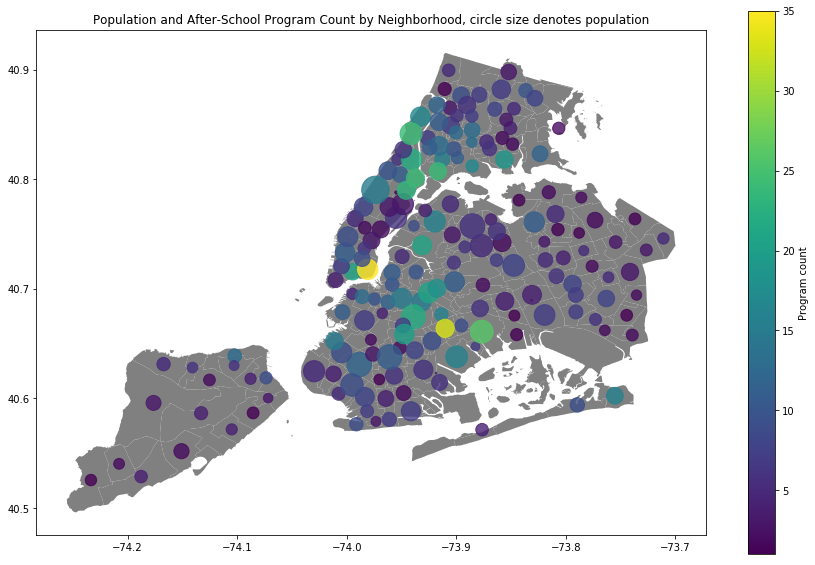

In [23]:
# Population will be represented as the marker size so
# we need to scale the population variable
# The factor 450 was determined through trial and error
scale_factor = 750
pcba['pop_scaled'] = (pcba.population / pcba.population.max()) * scale_factor

alpha = 0.8
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
areas.plot(ax=ax, color='gray')
pcba.plot(ax=ax, column='count', markersize=pcba['pop_scaled'], alpha=alpha)
ax.set_title('Population and After-School Program Count by Neighborhood, circle size denotes population')

# Colorbars in geopandas are poorly supported
# The hack below came from: https://stackoverflow.com/a/49400266
from matplotlib.colors import Normalize
from matplotlib import cm
norm = Normalize(vmin=pcba['count'].min(), vmax=pcba['count'].max())
n_cmap = cm.ScalarMappable(norm=norm)
n_cmap.set_array([])
cb = fig.colorbar(n_cmap, ax=ax)
cb.set_label('Program count')

## Interpreting the combined population and program count plot

Besides noticing that Manhattan has densely populated neighborhoods, we see that its northern neighborhoods, along its border between the Bronx, have high numbers of after-school programs. The neighborhood with the most programs is the Lower East Side. In northern Brooklyn, we see a cluster of neighborhoods with about 20 programs each. On the other hand, southern Brooklyn has large populations with few programs. In the Bronx, moderately populated neighborhood are packed closely, and more programs are found in its southern neighborhoods. In eastern Queens and all of Staten Island we see spacious neighborhoods with smaller populations about 5 programs each.

This plot helped highlight populous neighborhood with few after-school program, like the Upper East Side in Manhattan, southern Brooklyn, and northern central Queens. 